In [1]:
from newick import loads
import newick
from DNASkittleUtils.DDVUtils import pp

# Cafe

Families for study were determined in "FunctionsForFamilies.ipynb" under the name `wgd_study_ints` based on the following criteria:
#### Select families for study in Repeated Loss Tree mode
* Must be in every Oleaceae species
* Must be in > 1 copy in >25% of the species
* Not present in more than two copies in any species
* Must have a std dev > 0, meaning variation is present
* Ks indicates copies were made in the most recent WGD

In [2]:
import csv

all_trees = {}
with open(r"CAFE-4.2\data\corrected_root\reports\corrected_root_OG_two_rate_shifted.cafe", 'r') as csvfile:
    lines = csvfile.readlines()[11:]
    for nLines, row in enumerate(lines):
        row = row.split('\t')
        all_trees[int(row[0])] = row[1]
len(all_trees)

27737

In [3]:
all_ids = list(all_trees.keys())
len(all_ids)

27737

In [4]:
list(all_trees.values())[:3]

['((((((((((((FRAX30_22:2,FRAX32_24:2)_25:1,FRAX28_27:3)_26:2,FRAX12_22:5)_26:4,(FRAX07_23:8,FRAX29_27:8)_29:1)_29:4,FRAX08_27:13)_31:1,(((((FRAX01_22:2,FRAX16_21:2)_22:4,FRAX15_26:6)_26:2,FRAX00_11:8)_26:2,(FRAX06_28:9,FRAX23_24:9)_29:1)_29:3,FRAX25_25:13)_31:1)_31:3,FRAX21_23:17)_32:2,(((FRAX19_35:8,FRAX20_23:8)_34:2,((FRAX11_32:5,FRAX27_29:5)_33:4,FRAX04_35:9)_34:1)_34:1,(((((FRAX03_17:1,FRAX09_32:1)_26:1,FRAX13_22:2)_26:2,(FRAX26_28:2,FRAX14_20:2)_27:2)_27:3,FRAX05_23:7)_29:2,FRAX33_23:9)_31:2)_34:8)_33:15,FRAX31_28:34)_30:2,Oeuropea_19:36)_29:36,Mguttatus_1:72)_19:7,Slycopersicum_5:79)_19:0',
 '((((((((((((FRAX30_20:2,FRAX32_18:2)_19:1,FRAX28_16:3)_19:2,FRAX12_19:5)_20:4,(FRAX07_17:8,FRAX29_16:8)_21:1)_21:4,FRAX08_19:13)_24:1,(((((FRAX01_20:2,FRAX16_19:2)_20:4,FRAX15_17:6)_21:2,FRAX00_22:8)_22:2,(FRAX06_20:9,FRAX23_20:9)_23:1)_23:3,FRAX25_21:13)_24:1)_24:3,FRAX21_19:17)_25:2,(((FRAX19_22:8,FRAX20_17:8)_23:2,((FRAX11_20:5,FRAX27_20:5)_22:4,FRAX04_20:9)_23:1)_23:1,(((((FRAX03_19:1,F

In [7]:
all_trees[all_ids[1]]

'((((((((((((FRAX30_20:2,FRAX32_18:2)_19:1,FRAX28_16:3)_19:2,FRAX12_19:5)_20:4,(FRAX07_17:8,FRAX29_16:8)_21:1)_21:4,FRAX08_19:13)_24:1,(((((FRAX01_20:2,FRAX16_19:2)_20:4,FRAX15_17:6)_21:2,FRAX00_22:8)_22:2,(FRAX06_20:9,FRAX23_20:9)_23:1)_23:3,FRAX25_21:13)_24:1)_24:3,FRAX21_19:17)_25:2,(((FRAX19_22:8,FRAX20_17:8)_23:2,((FRAX11_20:5,FRAX27_20:5)_22:4,FRAX04_20:9)_23:1)_23:1,(((((FRAX03_19:1,FRAX09_19:1)_19:1,FRAX13_19:2)_19:2,(FRAX26_20:2,FRAX14_19:2)_20:2)_20:3,FRAX05_16:7)_21:2,FRAX33_20:9)_22:2)_23:8)_25:15,FRAX31_20:34)_27:2,Oeuropea_20:36)_27:36,Mguttatus_9:72)_23:7,Slycopersicum_10:79)_23:0'

In [8]:
ordered_names = loads('((((((((((((FRAX30:2,FRAX32:2)<1>:1,FRAX28:3)<3>:2,FRAX12:5)<5>:4,(FRAX07:8,FRAX29:8)<9>:1)<7>:4,FRAX08:13)<11>:1,(((((FRAX01:2,FRAX16:2)<15>:4,FRAX15:6)<17>:2,FRAX00:8)<19>:2,(FRAX06:9,FRAX23:9)<23>:1)<21>:3,FRAX25:13)<25>:1)<13>:3,FRAX21:17)<27>:2,(((FRAX19:8,FRAX20:8)<31>:2,((FRAX11:5,FRAX27:5)<35>:4,FRAX04:9)<37>:1)<33>:1,(((((FRAX03:1,FRAX09:1)<41>:1,FRAX13:2)<43>:2,(FRAX26:2,FRAX14:2)<47>:2)<45>:3,FRAX05:7)<49>:2,FRAX33:9)<51>:2)<39>:8)<29>:15,FRAX31:34)<53>:2,Oeuropea:36)<55>:36,Mguttatus:72)<57>:7,Slycopersicum:79)<59>:0')[0]
def create_ordered_nodes(verbose=False):
    ordered_nodes = []
    for node in ordered_names.walk(mode="preorder"):
        if verbose:
            print(node.name, node.length)
        ordered_nodes.append({'name': node.name, 'length':node.length, 'losses': 0, 'gains': 0, 'avg#': 0})
    return ordered_nodes
_ = create_ordered_nodes(False)

In [9]:
def extract_count(name):
    if isinstance(name, newick.Node):
        name = name.name
    return int(name.split('_')[-1])

for node in loads(all_trees[wgd_study_jsg[1]])[0].walk(mode="preorder"):
    print(node.name, extract_count(node.name))

NameError: name 'wgd_study_jsg' is not defined

In [10]:
def populate_history_histogram(study_ints):
    ordered_nodes = create_ordered_nodes()
    genes_lost = {node['name']:set() for node in ordered_nodes}
    for fam_id in study_ints:
        newick_str = all_trees[fam_id]
        tree = loads(newick_str)[0]
        for index, node in enumerate(tree.walk(mode="preorder")):
            count = extract_count(node)
            tail = ''
            ordered_nodes[index]['avg#'] += count
            if node.ancestor:
                parent_count = extract_count(node.ancestor.name)
                if count < parent_count:
                    tail = ("loss")
                    ordered_nodes[index]['losses'] += 1 #parent_count - count
                    place_name = node.name.split('_')[0]
                    if place_name:
                        genes_lost[place_name].add(fam_id)  # record gene family
                elif count > parent_count:
                    tail = ("gain")
                    ordered_nodes[index]['gains'] += 1 #count - parent_count 
#             print(node.name, count, tail)
    for result in ordered_nodes:  # divide sum by length to get mean
        result['avg#'] /= len(study_ints)
    return ordered_nodes, genes_lost
ordered_nodes, genes_lost = populate_history_histogram(all_ids)
ordered_nodes

[{'avg#': 1.8670368100371346,
  'gains': 0,
  'length': 0.0,
  'losses': 0,
  'name': '<59>'},
 {'avg#': 1.8621696650683204,
  'gains': 1,
  'length': 7.0,
  'losses': 94,
  'name': '<57>'},
 {'avg#': 1.8603670187835744,
  'gains': 2148,
  'length': 36.0,
  'losses': 1936,
  'name': '<55>'},
 {'avg#': 1.8584201607960487,
  'gains': 6,
  'length': 2.0,
  'losses': 50,
  'name': '<53>'},
 {'avg#': 1.6689259833435484,
  'gains': 677,
  'length': 15.0,
  'losses': 5140,
  'name': '<29>'},
 {'avg#': 1.6003172657461153,
  'gains': 7,
  'length': 2.0,
  'losses': 1910,
  'name': '<27>'},
 {'avg#': 1.5910877167682158,
  'gains': 247,
  'length': 3.0,
  'losses': 518,
  'name': '<13>'},
 {'avg#': 1.5957024912571656,
  'gains': 126,
  'length': 1.0,
  'losses': 4,
  'name': '<11>'},
 {'avg#': 1.5013159317878646,
  'gains': 437,
  'length': 4.0,
  'losses': 3074,
  'name': '<7>'},
 {'avg#': 1.427984280924397,
  'gains': 171,
  'length': 4.0,
  'losses': 2151,
  'name': '<5>'},
 {'avg#': 1.3929768

In [12]:
ordered_nodes[0]['losses'], ordered_nodes[14]['losses'], ordered_nodes[15]['losses'], ordered_nodes[16]['losses']

(0, 4701, 6700, 27)

In [13]:
pp(sum(f['losses'] for f in ordered_nodes))

'266,936'

# Histogram of change per time interval

In [15]:
def ancestors_length(node):
    ancestors = []
    while node.ancestor:
        node = node.ancestor
        ancestors.append(node.length)
    return ancestors

def populate_change_histogram(results_per_node, blacklist_index):
    losses_per_interval = [0] * 79  # contain sums of changes
    gains_per_interval = [0] * 79  # contain sums of changes
    branch_occupancy = [0] * 79  # number of branches at that interval for normalization


    for node_i, node in enumerate(ordered_names.walk(mode="preorder")):
        if node_i not in blacklist_index:
            ancestor_sum_length = int(sum(ancestors_length(node)))
            my_end = ancestor_sum_length + int(node.length)
            for year in range(ancestor_sum_length, my_end):
                losses_per_interval[year] += results_per_node[node_i]['losses'] / node.length
                gains_per_interval[year] += results_per_node[node_i]['gains'] / node.length
                branch_occupancy[year] += 1
    print(gains_per_interval)
    print(branch_occupancy)
    normalized_losses = [losses / max(1,branches) for (losses, branches) in zip(losses_per_interval, branch_occupancy) ]
    normalized_gains = [gains / max(1,branches) for (gains, branches) in zip(gains_per_interval, branch_occupancy) ]
    print(normalized_gains)
    return normalized_losses, normalized_gains

<img src="CAFE-4.2/data/corrected_root/corrected_OG_tree.png">

In [18]:
blacklist = [ '<59>', '<57>', '<55>', 'Slycopersicum', 'Mguttatus']
blacklist_index = [i for i, node in enumerate(ordered_nodes) if node['name'] in blacklist]
assert len(blacklist) == len(blacklist_index)

In [19]:
normalized_losses, normalized_gains = populate_change_histogram(ordered_nodes, [])

[9.497287522603978, 9.497287522603978, 9.497287522603978, 9.497287522603978, 9.497287522603978, 9.497287522603978, 9.497287522603978, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 75.3822081575246, 98.49331926863572, 98.49331926863572, 154.2148878960867, 154.2148878960867, 154.2148878960867, 154.2148878960867, 154.2148878960867, 154.2148878960867, 154.2148878960867, 154.2148878960867, 154.2148878960867, 154.21488

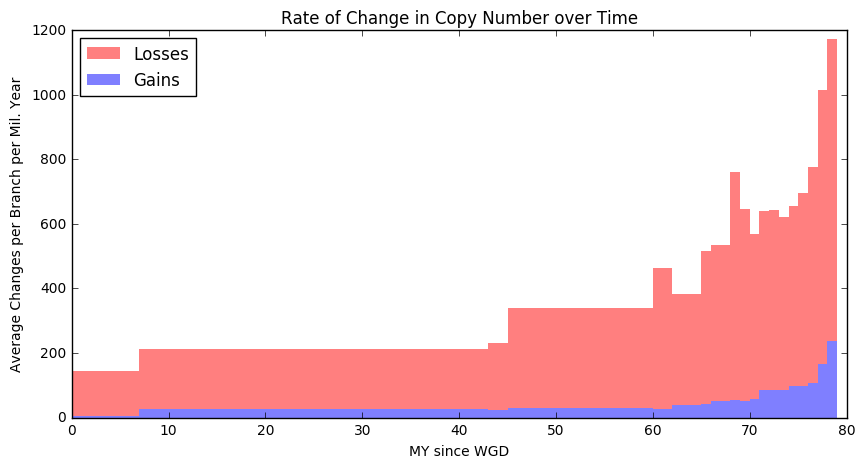

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_time_histogram(normalized_losses, normalized_gains):
    # plot time_intervals,  plot gains in different colors
    fig, ax = plt.subplots(figsize=(10,5), dpi=100)
    xs = np.arange(0, len(normalized_losses))
    bar_width = 1
    ax.bar(xs, normalized_losses, bar_width,
                    alpha=.5, color='r', linewidth=0,
                    label='Losses')
    ax.bar(xs, normalized_gains, bar_width,
                    alpha=1., color='#7F7FFF', linewidth=0,
                    label='Gains')
    ax.set_xlabel('MY since WGD')
    ax.set_ylabel('Average Changes per Branch per Mil. Year')
    ax.set_title('Rate of Change in Copy Number over Time')
    # ax.set_xticks(index + bar_width / 2)
    # ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
    ax.legend(loc='upper left')
    # fig.tight_layout()
plot_time_histogram(normalized_losses, normalized_gains)  

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 82.77777777777777, 82.77777777777777, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 138.49934640522875, 134.74101307189542, 134.74101307189542, 256.86846405228755, 256.86846405228755, 256.86846405228755, 329.5351307189543, 480.554361488185, 480.554361488185, 569.179361488185, 658.1793614881851, 972.3182503770738, 1694.8182503770738, 1800.6753932342167, 1840.6753932342167, 2313.5753932342163, 2385.0753932342163, 2730.9087265675494, 4950.908726567551, 7290.908726567551]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

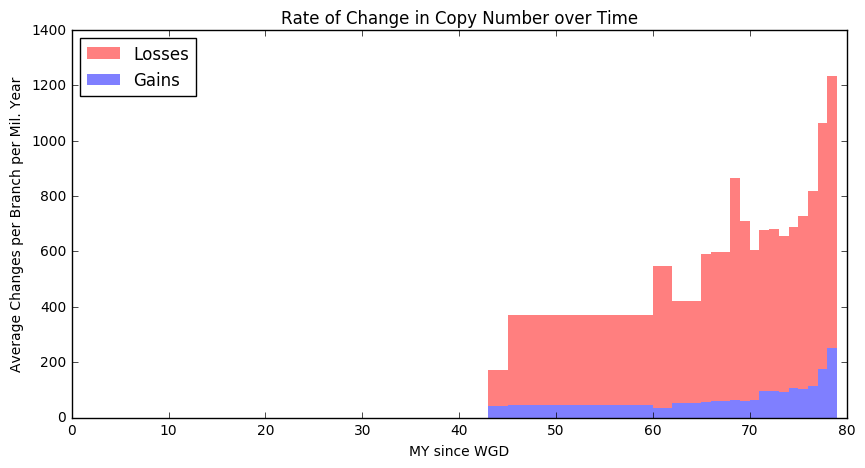

In [23]:
frax_normalized_losses, frax_normalized_gains = populate_change_histogram(ordered_nodes, blacklist_index)
plot_time_histogram(frax_normalized_losses, frax_normalized_gains)

**Conclusion: Supports lag-time model though could be from incomplete assembly and annotation.**

### Prefiltering for genes that are copy 2 at root

In [25]:
ordered_nodes[2]

{'avg#': 1.8603670187835744,
 'gains': 2148,
 'length': 36.0,
 'losses': 1936,
 'name': '<55>'}

In [26]:
def get_count_at_root(fam_id, ordered_node_index=2):
    newick_str = all_trees[fam_id]
    tree = loads(newick_str)[0]
    for index, node in enumerate(tree.walk(mode="preorder")):
        if index == ordered_node_index:
            count = extract_count(node)
            return count

In [27]:
filtered_wgd_study_ints = [fam for fam in all_ids if get_count_at_root(fam) == 2]
assert all([get_count_at_root(fam)==2 for fam in filtered_wgd_study_ints])

print(pp(len(filtered_wgd_study_ints) / len(all_ids)), 'preserved')

25.388470% preserved


In [29]:
def i_hist(values):
    bins = [0] * (max(values) +1)
    for v in values:
        bins[v] += 1
    return bins

copies = [ get_count_at_root(fam, ordered_node_index=2) for fam in all_ids]
print(i_hist(copies))

[196, 14992, 7042, 2953, 1250, 615, 266, 157, 84, 48, 38, 23, 16, 14, 8, 6, 3, 3, 5, 9, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1]


In [30]:
def pretty_hist(title, raw_values, x_title="Number of events", y_title="Number of Families"):
    import pandas
    df = pandas.Series(raw_values)#, columns=['Family ID', 'Copies'])
    bins = max(raw_values)
    f = df.hist(bins=bins, figsize=(10,5), facecolor='#31a354', edgecolor='#31a354')#dpi=300)
    f.grid(False)
    f.set_xticks([i for i in range(bins) if i %2 == 0])
    f.set_title(title)
    f.set_xlabel(x_title)
    f.set_ylabel(y_title)

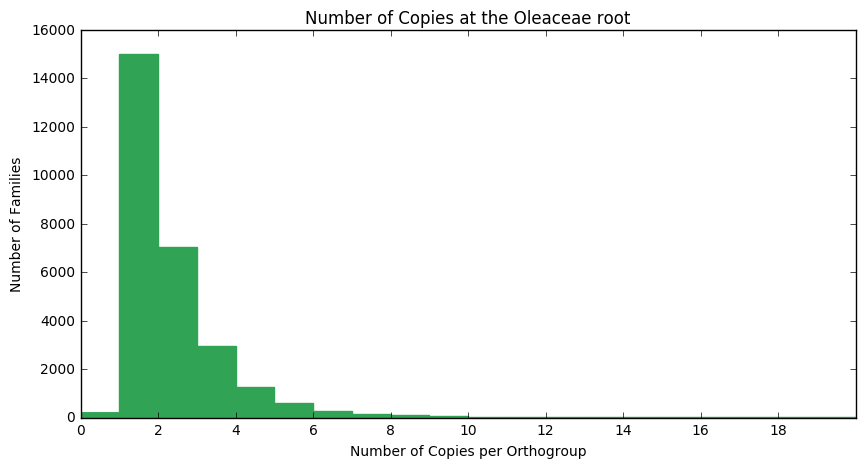

In [32]:
pretty_hist('Number of Copies at the Oleaceae root', [c for c in copies if c < 21], x_title="Number of Copies per Orthogroup")

In [35]:
ordered_nodes[1]  # <57> predates the WGD

{'avg#': 1.8621696650683204,
 'gains': 1,
 'length': 7.0,
 'losses': 94,
 'name': '<57>'}

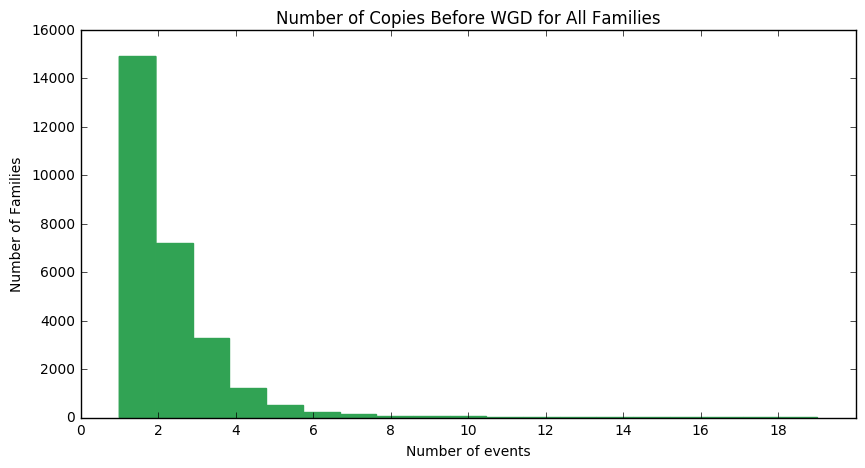

In [36]:
copies_before_WGD = [ get_count_at_root(fam, ordered_node_index=1) for fam in all_trees.keys()]
pretty_hist('Number of Copies Before WGD for All Families', [c for c in copies_before_WGD if c < 21])

**Conclusion:copy  at root.  **

## Patterns of Repeated Loss
All families in the study have at least one loss event present which could affect one or more species depending on the position in the tree.  If the species with copy number 1 are all monophyletic, then only one event is necessary.  If they are polyphyletic, then multiple events are necessary.  But what is our null distribution?  What is a chance scattering uniformly across time?  Is it similar to our history histogram?

In [37]:
def collect_loss_events_per_family(study_ints, blacklist_index):
    ordered_nodes = create_ordered_nodes()
    loss_events_per_family = {'pad':0}
    for fam_id in study_ints:
        current_family_loss_events = 0
        species_total = 0
        newick_str = all_trees[fam_id]
        tree = loads(newick_str)[0]
        for index, node in enumerate(tree.walk(mode="preorder")):
            count = extract_count(node)
            if node.ancestor and index not in blacklist_index:
                if not node.name.startswith('_'):
                    species_total += count
                parent_count = extract_count(node.ancestor.name)
                if count < parent_count:  # "loss"
                    current_family_loss_events += 1
                elif count > parent_count:  # gain
                    pass
        loss_events_per_family[fam_id] = current_family_loss_events
    pretty_hist("Repeated Loss in the Same Gene Family", list(loss_events_per_family.values()))
    return loss_events_per_family

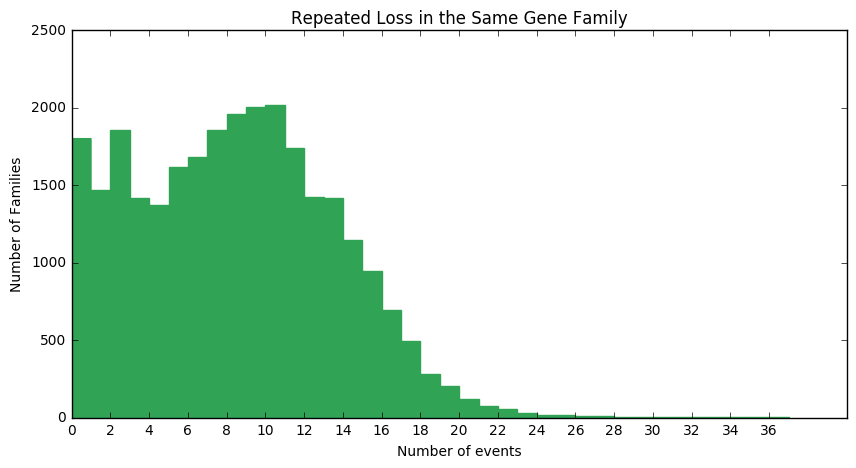

In [38]:
all_loss_events = collect_loss_events_per_family(list(all_trees.keys()), blacklist_index)

* families of different size, big families can have more losses
* Annotation errors
* Different selective constraints

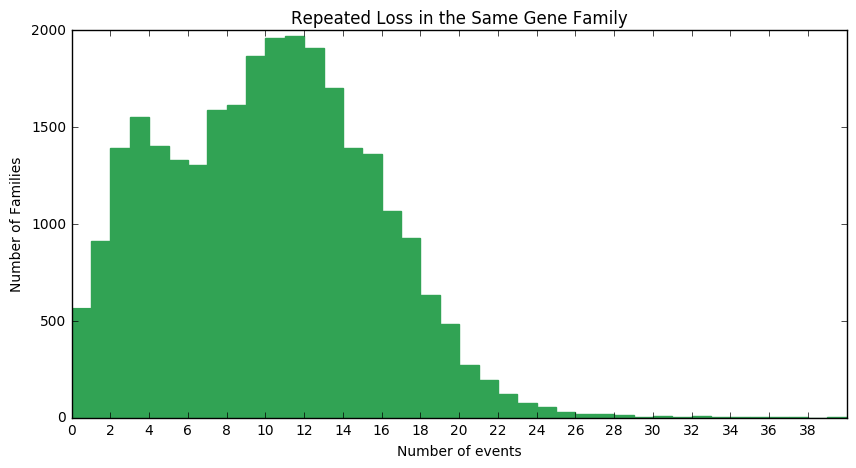

In [39]:
whole_tree_losses = collect_loss_events_per_family(list(all_trees.keys()), [])

There's very clearly two distributions

In [40]:
doubles_ids = [fam for fam in list(all_trees.keys()) if get_count_at_root(fam) == 2]
assert all([get_count_at_root(fam)==2 for fam in doubles_ids])

print(pp(len(doubles_ids) / len(all_trees)), 'preserved')

25.388470% preserved


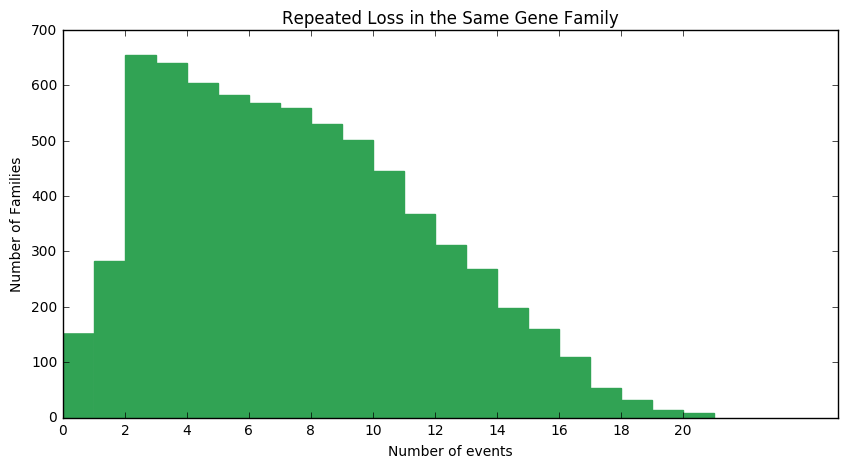

In [41]:
losses_from_all_doubles = collect_loss_events_per_family(doubles_ids, blacklist_index)

**Conclusion**: filtering by doubles looks similar to filtered_wgd_study_ints except there's a bigg peak at 2.

## Categorical Histograms combined

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def categorical_histogram(title, datasets, normalize=False):
    # plot time_intervals,  plot gains in different colors
    fig, ax = plt.subplots(figsize=(10,5), dpi=600, facecolor='white')
    hist_series = [[label, i_hist(values)] for label, values in datasets.items()]
    longest = max([len(hist[1]) for hist in hist_series])  
    for i, pair in enumerate(hist_series):
        hist_series[i][1] = (hist_series[i][1] + [0] * longest)[:longest] # zero padding
    xs = np.arange(0, longest)  # set x axis
    bar_width = 1
    cmap = plt.get_cmap("Dark2")
    colors = cmap(np.arange(len(datasets))*50)

    height_sorted = sorted(hist_series, key=lambda pair: -max(pair[1]))
    tops = [max(pair[1]) for pair in height_sorted]
    for i, pair in enumerate(height_sorted):
        label, bars = pair
        adjusted_bars = [b*(tops[0] / tops[i]) for b in bars]
        if normalize:
            bars = adjusted_bars
        ax.bar(xs, bars, bar_width,
                    alpha=.4, color=colors[i], linewidth=0,
                    label=label)
        
    ax.set_xlabel('Independent Events')
    ax.set_ylabel('Count #')
    ax.set_title(title)
    # ax.set_xticks(index + bar_width / 2)
    # ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
    ax.legend(loc='upper right')
    # fig.tight_layout()
    

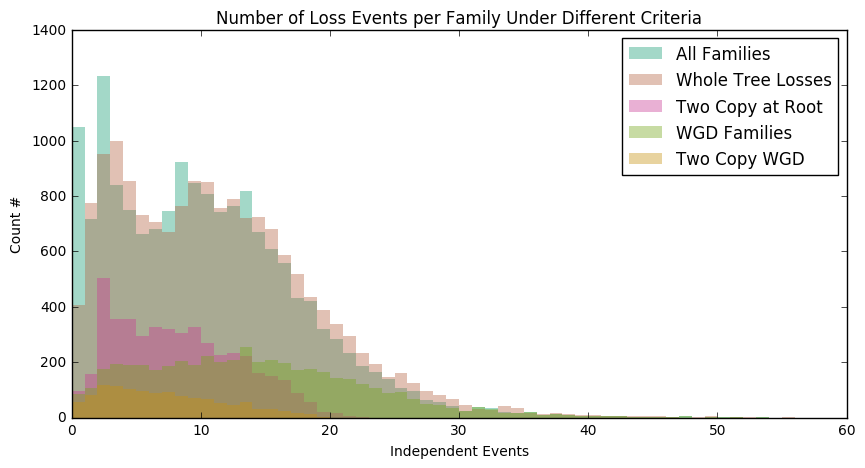

In [42]:
categorical_histogram('Number of Loss Events per Family Under Different Criteria',
    {'All Families': all_loss_events.values(), 'WGD Families': wgd_study_jsg_losses.values(),
     'Two Copy at Root': losses_from_all_doubles.values(),
    'Whole Tree Losses': whole_tree_losses.values(), 'Two Copy WGD': loss_events_per_family.values()})

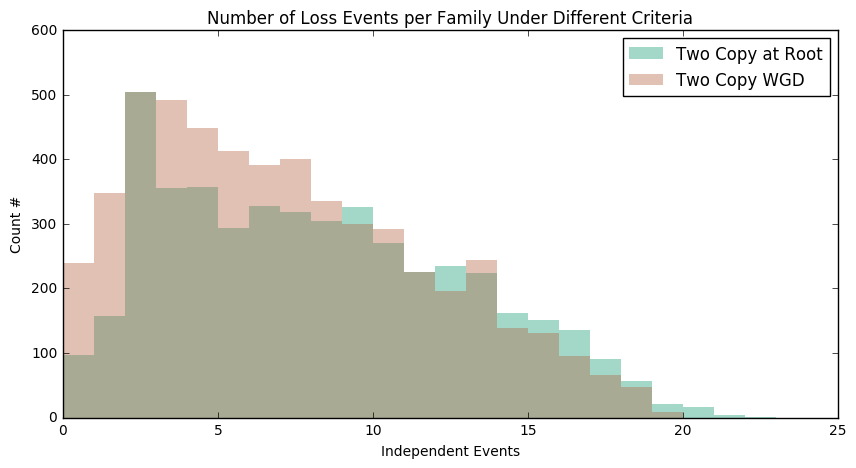

In [43]:
categorical_histogram('Number of Loss Events per Family Under Different Criteria',
    {
     'Two Copy at Root': losses_from_all_doubles.values(),'Two Copy WGD': loss_events_per_family.values()}, True)

** There's very clearly multiple distributions being stacked together here.  "All Families" is zero inflated, so there are a decent number of families with no variation at all.  Then there's a spike around 2-3 that is likely the annotation error spike that should actually be assigned to zero.  Following that is the main hump around 10 losses.  This is real variation.  Including outgroup counts shifts the distribution over by one since the outgroups don't share the WGD, but other than that they're very similar.  One might make some inference about the error peak being wider in the outgroups.**

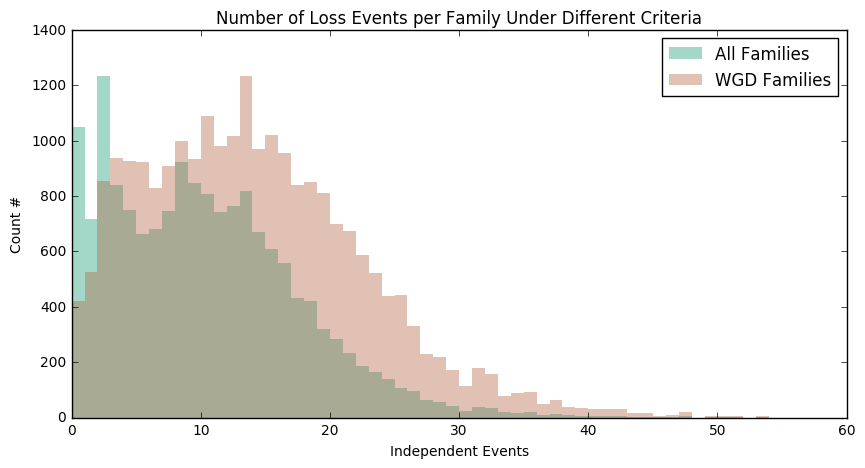

In [44]:
categorical_histogram('Number of Loss Events per Family Under Different Criteria',
    {'All Families': all_loss_events.values(), 'WGD Families': wgd_study_jsg_losses.values(),
    }, True)

In [45]:
pp(len(all_trees))

'16,191'

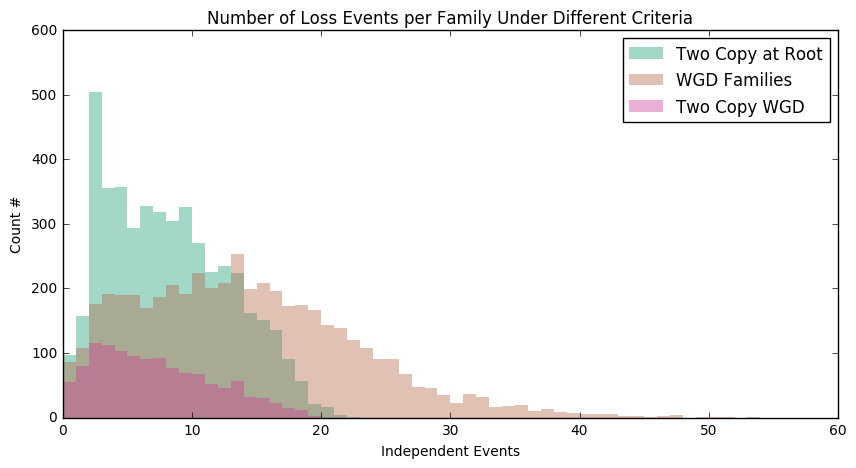

In [46]:
categorical_histogram('Number of Loss Events per Family Under Different Criteria',
    {'WGD Families': wgd_study_jsg_losses.values(),
     'Two Copy at Root': losses_from_all_doubles.values(),
    'Two Copy WGD': loss_events_per_family.values()})

Looks like a [Gamma Distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm)

## Intersecting Sets of Polyphyletic Gene Family losses

In [47]:
from scipy.stats import hypergeom

def simple_overlap_prob(A, B, all_possible, verbose=True):
    intersect = len(set(A).intersection(set(B)))
    if verbose:
        print(pp(len(A)), "overlapping with", pp(len(B)), "by", pp(intersect),"in a space of size", pp(len(all_possible)))
    return min(1, hypergeom.sf(intersect-1, len(all_possible), len(A), len(B)))  # pval assuming even distribution

In [48]:
 species_names = [node['name'] for node in ordered_nodes if node['name'] not in ('Slycopersicum', 'Mguttatus') and not node['name'].startswith('<')]  # 

# All pair wise combintations once
for x in range(len(species_names)):
    for y in range(x+1, len(species_names)):
        intersect = genes_lost[species_names[x]].intersection(genes_lost[species_names[y]])
        print(species_names[x], species_names[y], len(intersect), end=': ')
        print(simple_overlap_prob(genes_lost[species_names[x]], genes_lost[species_names[y]], wgd_study_jsg, verbose=False)) #TODO probability

FRAX30 FRAX32 61: 0.9999999999875859
FRAX30 FRAX28 991: 1
FRAX30 FRAX12 1227: 1
FRAX30 FRAX07 950: 1
FRAX30 FRAX29 1207: 1
FRAX30 FRAX08 1535: 1
FRAX30 FRAX01 428: 0.9999999999896665
FRAX30 FRAX16 829: 1
FRAX30 FRAX15 1029: 1
FRAX30 FRAX00 678: 0.9999999999903687
FRAX30 FRAX06 913: 1
FRAX30 FRAX23 1374: 1
FRAX30 FRAX25 1612: 1
FRAX30 FRAX21 1601: 1
FRAX30 FRAX19 804: 1
FRAX30 FRAX20 1288: 1
FRAX30 FRAX11 467: 0.9999999999898324
FRAX30 FRAX27 712: 0.9999999999924145
FRAX30 FRAX04 1150: 1
FRAX30 FRAX03 789: 1
FRAX30 FRAX09 360: 0.9999999999979846
FRAX30 FRAX13 891: 1
FRAX30 FRAX26 368: 0.9999999999913112
FRAX30 FRAX14 813: 1
FRAX30 FRAX05 1002: 1
FRAX30 FRAX33 1017: 1
FRAX30 FRAX31 1741: 1
FRAX30 Oeuropea 1293: 1
FRAX30 empty 2397: 1
FRAX32 FRAX28 996: 0.9999999999840152
FRAX32 FRAX12 1183: 1
FRAX32 FRAX07 955: 1
FRAX32 FRAX29 1151: 1
FRAX32 FRAX08 1455: 1
FRAX32 FRAX01 403: 0.9999999999866933
FRAX32 FRAX16 811: 1
FRAX32 FRAX15 969: 1
FRAX32 FRAX00 645: 0.9999999999875583
FRAX32 FRAX06 8

** Conclusion: Probabilities of overlapping sets are mostly insignificant.  Most likely assembly errors...**

## Null model for deletion events
Assume a uniform probability of having a deletion at any time point per branch.  Veto deletions that would drop the number to 0 in FRAX00.  Keep creating deletions until the average copy# per extant species matches for that family.

Construct one path for each species.  Path is a set of nodes.  Randomly pick species.  Randomly pick node weighted by node length.  Add a loss event, repeat until average is acheived.  Graph ensuing histogram

```
constraints = FRAX00 must have > 0,  no species has less than 0
n_deletions = 2 * 6 - sum(
for family_tree in all_trees:
    for path in species_paths:
        
        while current_count > terminal_count[species]:
            branch = random.choice(path, weights)
            branch.count -= 1
            for d in branch.descendants:
                branch.count -= 1
                if d.count < actual_count:
                    veto deletion
                #this is getting really complicated
```

In [49]:
all_trees[1]

KeyError: 1

In [ ]:
img('../Figure for Notes/Distribution of Family Average Copy Number.png')

In [ ]:
avg_losses = [600,280, 100,]

# WGD Rates Loose

Lots of overlap in sister species.  Is that significant out of 27,737 families?

In [ ]:
goodingii_greggii = 1981
hypergeom.sf(goodingii_greggii-1, 27737, 3261+goodingii_greggii, 6267+goodingii_greggii)  # pval assuming even distribution 27737

In [ ]:
angustifolia_syriaca = 1500
hypergeom.sf(angustifolia_syriaca-1, 27737, 2847+angustifolia_syriaca, 5070+angustifolia_syriaca)  # pval assuming even distribution 27737

**Conclusion:** That's a good sign these are real overlaps between sister species assembled independently and not simply lossy draft assemblies that overlap by chance.

In [ ]:
ornus_bungeana = 50
hypergeom.sf(ornus_bungeana-1, 16191, 1198+ornus_bungeana, 1486+ornus_bungeana)  # pval assuming even distribution

**Conculsions:** Ornus and bungeana in Expansions of fixed_JSG actually don't have significant overlap.